# データ処理with生成ＡＩ

---

# このNotenbookの内容

- pandas ライブラリ
- webスクレイピング

***
# pandas ライブラリ

- 参考：東京大学「Pythonプログラミング入門」, 7-1 pandasライブラリ  
[https://utokyo-ipp.github.io/7/7-1.html](https://utokyo-ipp.github.io/7/7-1.html)

- Wikipedia - pandas  
[https://ja.wikipedia.org/wiki/Pandas](https://ja.wikipedia.org/wiki/Pandas)

## pandas ライブラリとは

日本語Wikipediaより。

> pandasは、プログラミング言語Pythonにおいて、データ解析を支援する機能を提供するライブラリである。  
> 特に、数表および時系列データを操作するためのデータ構造と演算を提供する。  
> pandasはBSDライセンスのもとで提供されている。

## pandas の基本機能

### 1. `pandas.DataFrame`形式, `pandas.series`形式

pandasでは、表構造を`pandas.DataFrame`（以下、`DataFrame`）、単一列構造を`pandas.Series`（以下、`Series`）として扱い、様々な機能を提供します。  
まずは csv データを`DataFrame`として読み込んでみましょう。

In [ ]:
import pandas as pd

# 変数 df に niigata_population.csv を読み込む。
df = pd.read_csv("niigata_population.csv")

# 表示。
display(df)

`df` には180行39列の csv データが `DataFrame` 形式で格納されています。  
`DataFrame` 形式では、構造化データの処理に必要な様々な関数（モジュール）が使用できます。  

In [ ]:
#行数と列数の取得
print(df.shape)

#列名の取得
print(df.columns)

# 統計量の表示
display(df.describe())

`DataFrame` から特定の列を `Series` として取り出せます。

In [ ]:
# "西区人口[人]"列を取得
df["西区人口[人]"]

In [ ]:
# 5行目を取得
df.iloc[4,:] # 0行目から数える

簡単なグラフの描画にも対応しています。

In [ ]:
# 描画用のライブラリ
import matplotlib.pyplot as plt
import japanize_matplotlib

# 折れ線グラフの作成
df["新潟市人口[人]"].plot()
plt.show() # 作成したグラフの描画

### 演習：`for`文と`if`文の復習
全ての列の折れ線グラフを描画してください。

<details><summary>コード作成例（クリックで表示）</summary>

```python  
import matplotlib.pyplot as plt
import japanize_matplotlib

for col_name in df.columns: # 全ての列名でループ
    if col_name != "年[和暦]": # "年[和暦]"列は数値ではないためエラーが出る。
        print(col_name)
        df[col_name].plot()
        plt.show() 
```
</details>

In [ ]:
# ヒント：df.columns で列名の配列を取得できる。
import matplotlib.pyplot as plt
import japanize_matplotlib



***
## 生成ＡＩにプログラムを書いてもらう

データが月ごとになっているので、グラフも月ごとに描画されています。  
正直読み難いので、各年の4月でグラフを描画してみましょう。

プログラミングの学習という意味では、解説サイトや`pandas`のドキュメントを読んで一度自力で記述する経験は大事です。  
ただ、何をすればよいか理解している段階であれば、プログラムの記述はただの作業です。  

ここでは、**プログラムの記述作業を**生成AIに任せて目的を達成してみましょう。

#### 作業（タスク）の整理
現在の状態と、生成ＡＩに何をさせたいかを整理します。

- pythonのプログラムコードを記述する。
- `pandas.read_csv`で読み込んだデータが`pandas.DataFrame`形式で変数`df` に格納されている。
- `"年[西暦]"`, `"月"`列を参照して、各年の4月の値で各列の折れ線グラフを作成したい。
- 既存のコードに最小限の追記としたい。


In [ ]:
# 生成ＡＩに書かせたコードを実行してみる



### エラーが出たら・・・

エラー文を読んで修正しましょう。  
生成ＡＩのスレッドでエラー文を投げてもよいですが、生成ＡＩ側の情報が変化しない状態でエラー文だけを投げても解決しないことがほとんどです。  
原因として考えられることとしては以下があります；
- 生成ＡＩに渡す情報が不足している/誤っている
- ライブラリバージョン（生成ＡＩの学習データ）の違いによる誤謬
- 質問が高度すぎて生成ＡＩの能力を超えている

場合によってはGoogleで検索した方が早く解決するかもしれません。


また、原則は事前にエラーの有無を確認してから実行すべきです。  
しかし、実践的には「実行してみてエラーが出たら修正する」の方が作業効率は高いです。  
いずれにせよ、最終的には全ての行について自身の責任で意図した動作になっていることを確認しましょう。


***

---
# Webスクレイピング

**Webスクレイピング**とは、Webサイトから画像データやテキストデータを抽出するデータ収集手法です。  
世界中の膨大なWebデータを利用できることから広く使用されている手法ですが、権利侵害やサイトの利用規約違反になる場合があるため、特に二次利用や二次配布を行う場合には慎重な検討が必要です。


ここでは、新潟大学の公式HPから、直近3年の卒業式の学長告辞本文を抽出してみましょう。

大まかなタスクと条件は以下の通りです。
- 対象となるwebページのURLのリストを作成する。
- `request` ライブラリを使用してURLにアクセスし、htmlデータを取得する。
- `BeautifulSoup` ライブラリを使用してhtmlデータから本文を抽出する。
- 本文とは、`<div id="content_area">`に記述されたテキストである。															</div>

In [ ]:
# URLのリストを作成する
url_list=[]

In [ ]:
# 生成ＡＩに書かせたコードを実行してみる


### 補足：プロンプト戦略
生成ＡＩに入力するテキストを**プロンプト**と呼びます。  
生成ＡＩへの指示は、対人の表現とは異なり、生成ＡＩにあわせたプロンプトが推奨されます。  

プロンプトでは、出力が一意に定まる（関数でいう一対一になる）ように条件を限定することが望ましいです。  

また、一度の入出力ではできるだけ少ない作業（タスク）を行い、ステップバイステップで作業を進めることが推奨されています。  

上記のタスクでは、htmlから本文を抽出するまでを指示しています。  
成功したようであれば、追加で以下のタスクに取り組んでみてください。

- 抽出した学長告辞を`DataFrame`で変数に格納する
- `DataFrame`を csv 形式で保存する
- 学長告辞のワードクラウドを描画してみる

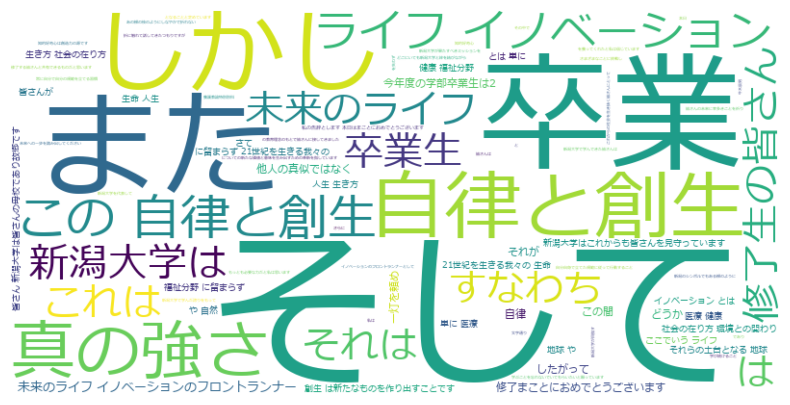

***
抽出対象の定義を変えれば、画像の抽出・データベース化もできます！  
工夫次第です！トライしてみましょう！